In [1]:
# Q1) Delivery_time -> Predict delivery time using sorting time Build a simple linear regression 
# model by performing EDA and do necessary transformations and select the best model 
# using R or Python.




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
DT_df = pd.read_csv('delivery_time.csv')
DT_df.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
DT_df.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


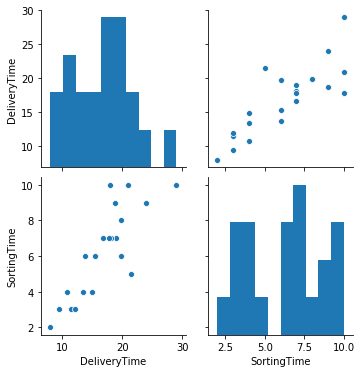

In [4]:
sns.pairplot(DT_df.iloc[:,0:2])

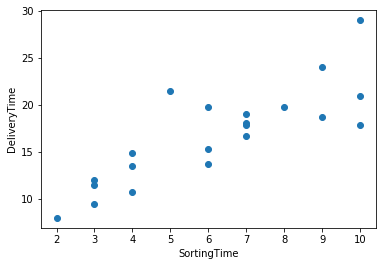

In [6]:
plt.scatter(x = DT_df['SortingTime'], y = DT_df['DeliveryTime'])
plt.xlabel("SortingTime")
plt.ylabel("DeliveryTime")
plt.show()

In [7]:
# Model Creation

In [8]:
DT_df.SortingTime.corr(DT_df.DeliveryTime)
np.corrcoef(DT_df.SortingTime,DT_df.DeliveryTime)

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

# EDA and Data Visualization

In [10]:
DT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


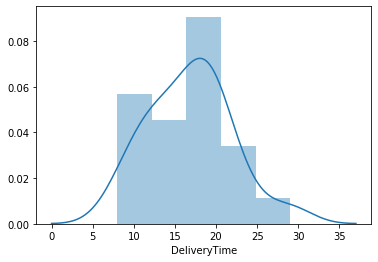

In [12]:
sns.distplot(DT_df['DeliveryTime'])

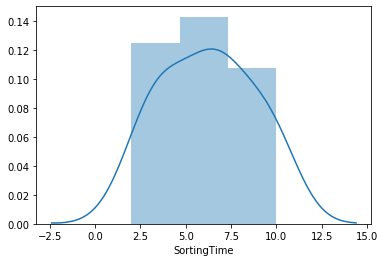

In [13]:
sns.distplot(DT_df['SortingTime'])

In [14]:
DT_df=DT_df.rename({'DeliveryTime':'Delivery_Time','SortingTime':'Sorting_Time'}, axis=1)
DT_df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [15]:
DT_df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


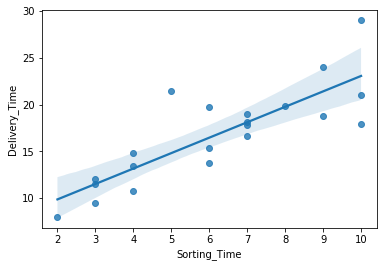

In [16]:
sns.regplot(x=DT_df['Sorting_Time'],y=DT_df['Delivery_Time'])

In [17]:
model = smf.ols("Delivery_Time~Sorting_Time",data=DT_df).fit()

In [18]:
model.params #Finding Coefficient parameters

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [19]:
model.tvalues, model.pvalues #Finding tvalues and pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [20]:
model.rsquared, model.rsquared_adj #FInding Rsquared Values

(0.6822714748417231, 0.6655489208860244)

In [23]:
# Predictions for sorting time 5
Delivery_Time = (6.582734) + (1.649020) * (5)
Delivery_Time

14.827834

In [26]:
#Prediction for sorting time 5,8
data = pd.Series([5,8])
data

0    5
1    8
dtype: int64

In [27]:
data_pred = pd.DataFrame(data,columns=['Sorting_Time'])

In [28]:
data_pred

,Sorting_Time
0,5
1,8


In [29]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [30]:
# Q2) Salary_hike -> Build a prediction model for Salary_hike Build a simple linear regression 
# model by performing EDA and do necessary transformations and select the best model 
# using R or Python.




data1 = pd.read_csv('Salary_Data.csv')

In [32]:
data1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


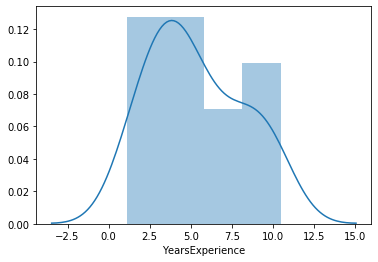

In [34]:
sns.distplot(data1['YearsExperience'])

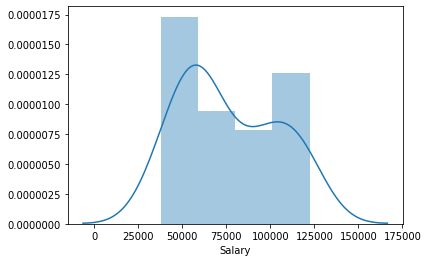

In [35]:
sns.distplot(data1['Salary'])

In [36]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


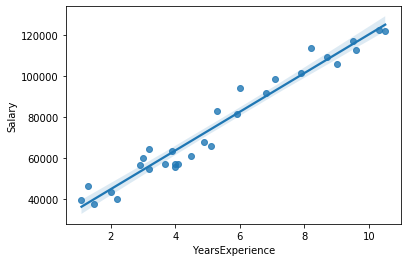

In [37]:
sns.regplot(x=data1['YearsExperience'],y=data1['Salary'])

In [38]:
model1= smf.ols("Salary~YearsExperience", data=data1).fit()

In [39]:
model1.params #Finding Coefficient Paramerters

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [40]:
model1.tvalues, model1.pvalues   #Finding tvalues and pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [41]:
model1.rsquared, model1.rsquared_adj   #Finding Rsquared values

(0.9569566641435086, 0.9554194021486339)

In [42]:
# Prediction for 3 Years Experience
Salary1 = (25792.200199) + (9449.962321) * (3)
Salary1

54142.087162

In [43]:
# Prediction for 3 & 5 Years Experience
newdata = pd.Series([3,5])
newdata

0    3
1    5
dtype: int64

In [44]:
data_pred1 = pd.DataFrame(newdata, columns=['YearsExperience'])
data_pred1

,YearsExperience
0,3
1,5


In [45]:
model1.predict(data_pred1)

0    54142.087163
1    73042.011806
dtype: float64